In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
# Load the dataset
data = pd.read_excel(f'H:\Project\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [69]:
# Ensure 'Churn' column exists
if 'Churn' not in data.columns:
    raise KeyError("'Churn' column not found in the dataset")

# Identify columns with mixed data types
for column in data.columns:
    if data[column].apply(type).nunique() > 1:
        print(f"Column '{column}' has mixed data types: {data[column].apply(type).unique()}")

# Convert 'TotalCharges' to numeric, forcing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values
data.fillna(method='ffill', inplace=True)

Column 'TotalCharges' has mixed data types: [<class 'float'> <class 'int'> <class 'str'>]


In [70]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into training and testing sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# Train Logistic Regression with increased max_iter
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [74]:
# Train SVM with scaled data
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

# Evaluate the models

In [75]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    return accuracy, precision, recall, f1

dt_metrics = evaluate_model(dt_model, X_test, y_test)
rf_metrics = evaluate_model(rf_model, X_test, y_test)
lr_metrics = evaluate_model(lr_model, X_test_scaled, y_test)
svm_metrics = evaluate_model(svm_model, X_test_scaled, y_test)

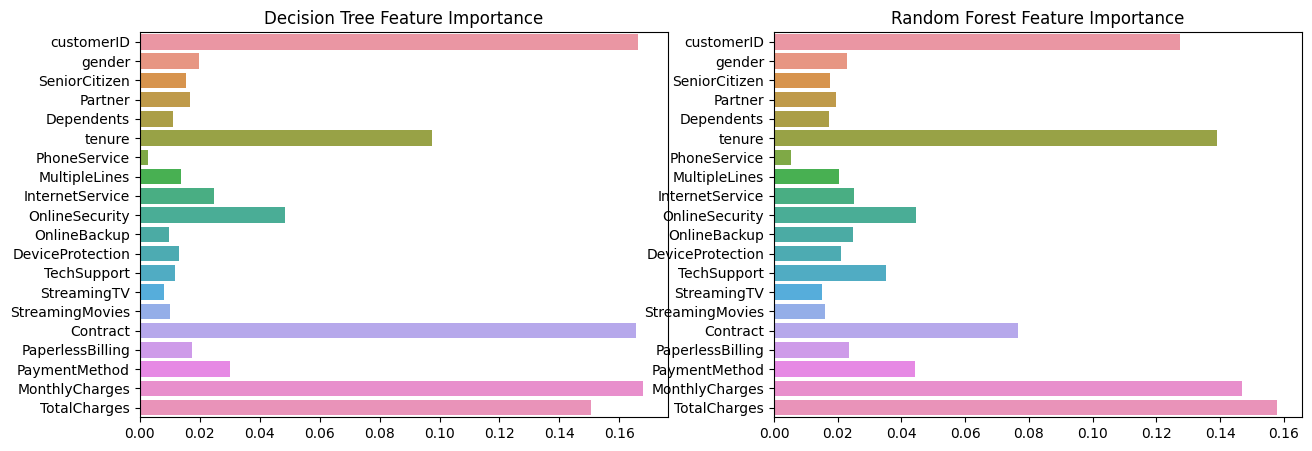

In [76]:
# Feature importance
dt_feature_importance = dt_model.feature_importances_
rf_feature_importance = rf_model.feature_importances_

# Plot feature importance
features = X.columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=dt_feature_importance, y=features, ax=axes[0])
axes[0].set_title('Decision Tree Feature Importance')
sns.barplot(x=rf_feature_importance, y=features, ax=axes[1])
axes[1].set_title('Random Forest Feature Importance')
plt.show()

In [77]:
# Print evaluation metrics
print("Decision Tree Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(*dt_metrics))
print("Random Forest Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(*rf_metrics))
print("Logistic Regression Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(*lr_metrics))
print("SVM Metrics: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(*svm_metrics))

Decision Tree Metrics: Accuracy: 0.73, Precision: 0.48, Recall: 0.49, F1-Score: 0.49
Random Forest Metrics: Accuracy: 0.80, Precision: 0.65, Recall: 0.49, F1-Score: 0.56
Logistic Regression Metrics: Accuracy: 0.82, Precision: 0.68, Recall: 0.58, F1-Score: 0.62
SVM Metrics: Accuracy: 0.80, Precision: 0.68, Recall: 0.50, F1-Score: 0.57
